### - Tutorial: https://www.kaggle.com/prashant111/svm-classifier-tutorial


In [1]:
# Import necessary modules
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import make_blobs, make_circles,make_classification,make_gaussian_quantiles,make_hastie_10_2, make_circles,make_moons , load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
seed = 20240325

In [2]:
# Plotting function 
def plot_svc_decision_function(model, ax=None, mode='train'):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    X, Y = np.meshgrid(x, y)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    if mode == 'train':
        ax.contour(X, Y, P, colors='k',
                   levels=[-1, 0, 1], alpha=0.5,
                   linestyles=['--', '-', '--'])
    else:
        ax.contour(X, Y, P, colors='k',
                   levels=[0], alpha=0.5,
                   linestyles=['-'])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### 1. Kernel function and hyper paramters of support vector machine


In [3]:

X, y = make_blobs(n_samples=200, centers=2,random_state=seed, cluster_std=2)


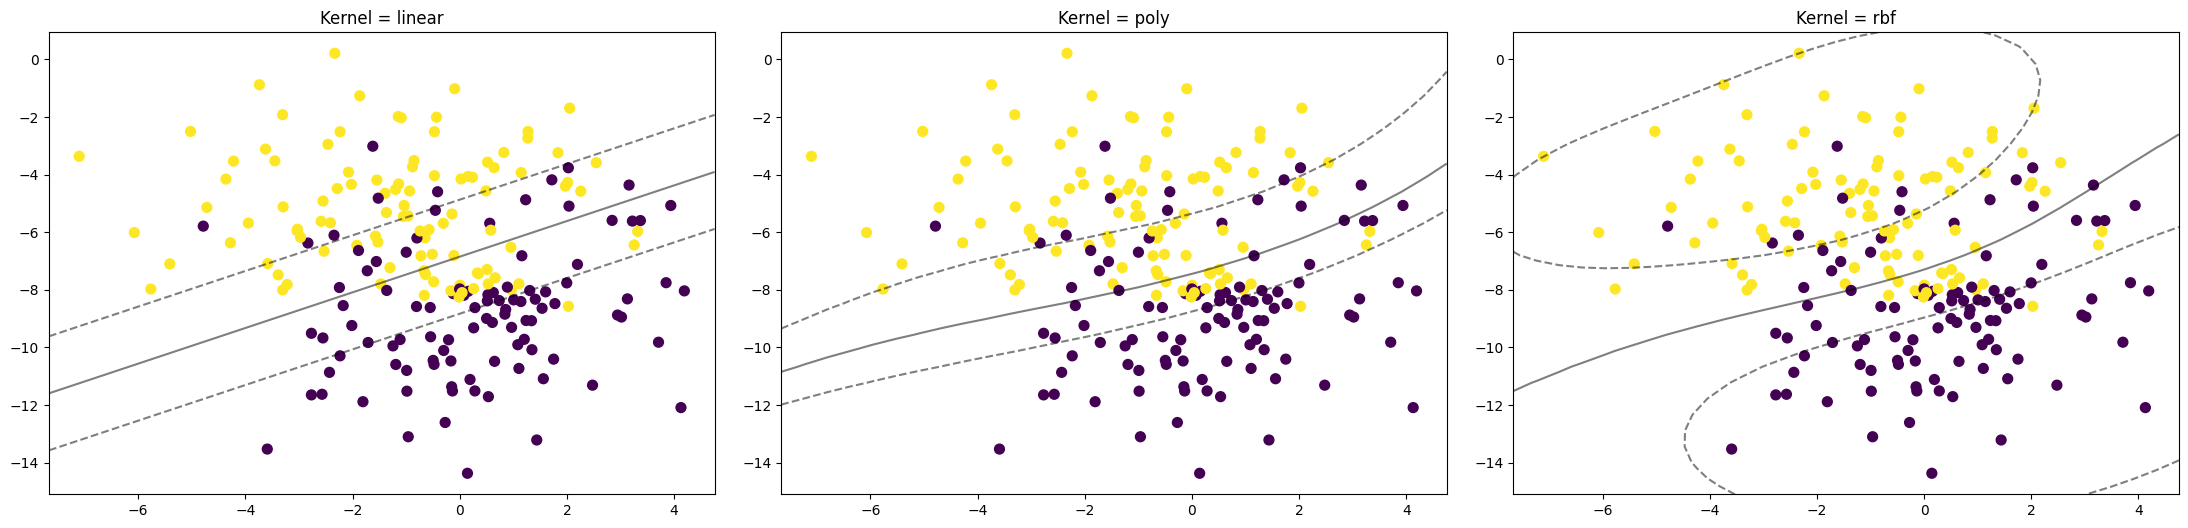

In [4]:
kernels = ['linear', 'poly', 'rbf']
fig, ax = plt.subplots(1, 3, figsize=(24, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, k in zip(ax, kernels):
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50)
    axi.set_title('Kernel = {0}'.format(k))
    model = SVC(kernel=k)
    model.fit(X, y)
    plot_svc_decision_function(model, axi)

In [5]:
X, y = make_circles(n_samples=200, noise=0.2, factor=0.5, random_state=seed)

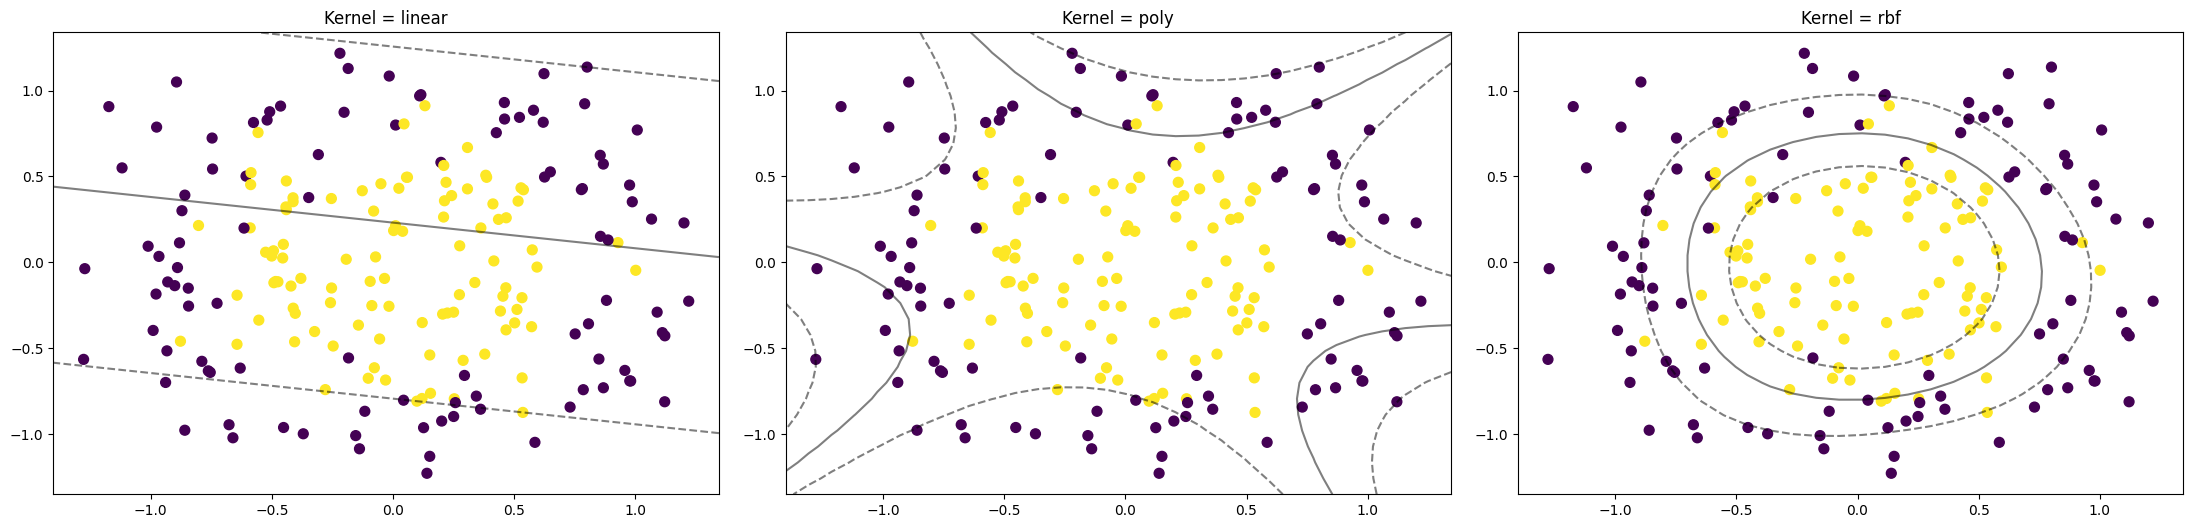

In [6]:
kernels = ['linear', 'poly', 'rbf']
fig, ax = plt.subplots(1, 3, figsize=(24, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, k in zip(ax, kernels):
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50)
    axi.set_title('Kernel = {0}'.format(k))
    model = SVC(kernel=k)
    model.fit(X, y)
    plot_svc_decision_function(model, axi)

#####  hyper parameter ***C*** 

In [7]:

X, y = make_blobs(n_samples=200, centers=2,random_state=seed, cluster_std=0.5)

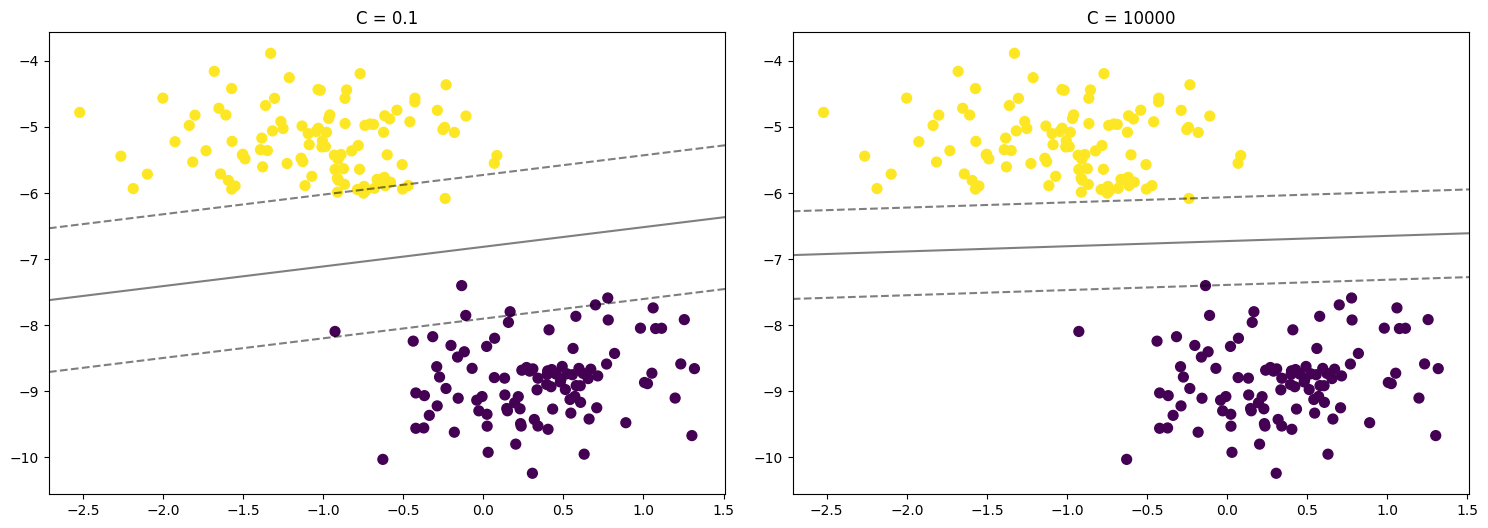

In [8]:
C = [0.1, 10000]
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, c in zip(ax, C):
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50)
    axi.set_title('C = {0}'.format(c))
    model = SVC(kernel='linear', C=c)
    model.fit(X, y)
    plot_svc_decision_function(model, axi)

##### hyper parameter ***degree***.

In [9]:
X, y = make_blobs(n_samples=200, centers=2,random_state=seed)

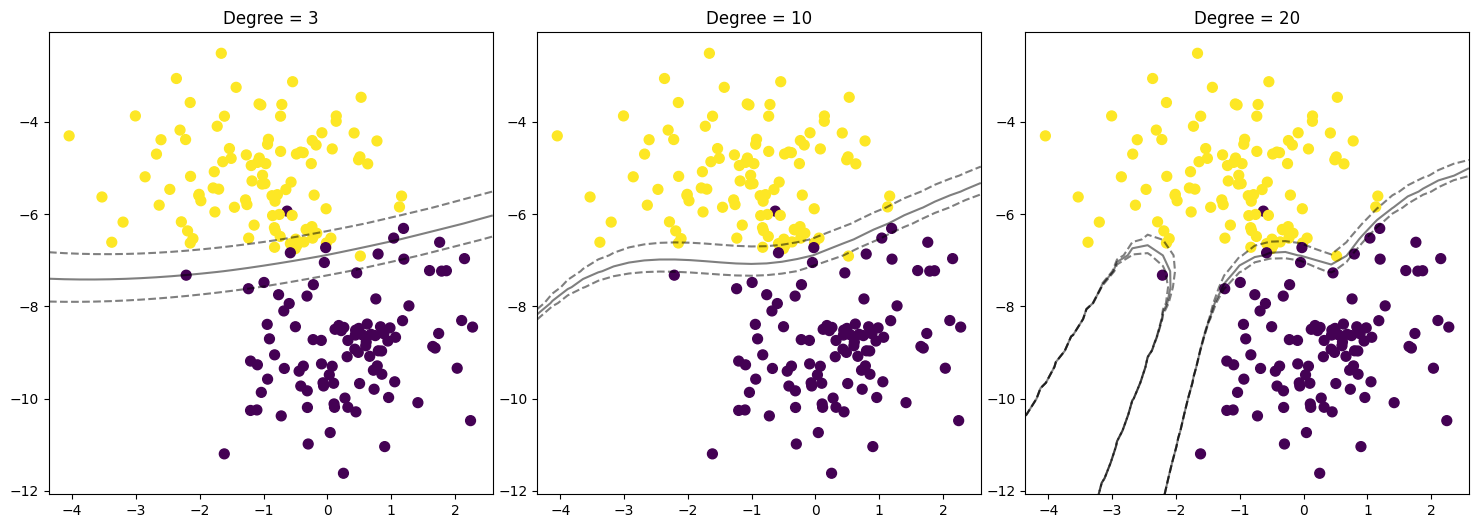

In [10]:
degrees = [3, 10, 20]
fig, ax = plt.subplots(1, len(degrees), figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, degree in zip(ax, degrees):
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50)
    axi.set_title('Degree = {0}'.format(degree))
    model = SVC(kernel='poly', degree=degree)
    model.fit(X, y)
    plot_svc_decision_function(model, axi)

##### hyper parameter ***gamma***.

In [ ]:
X, y = make_circles(n_samples=200, noise=0.3, factor=0.3, random_state=seed)

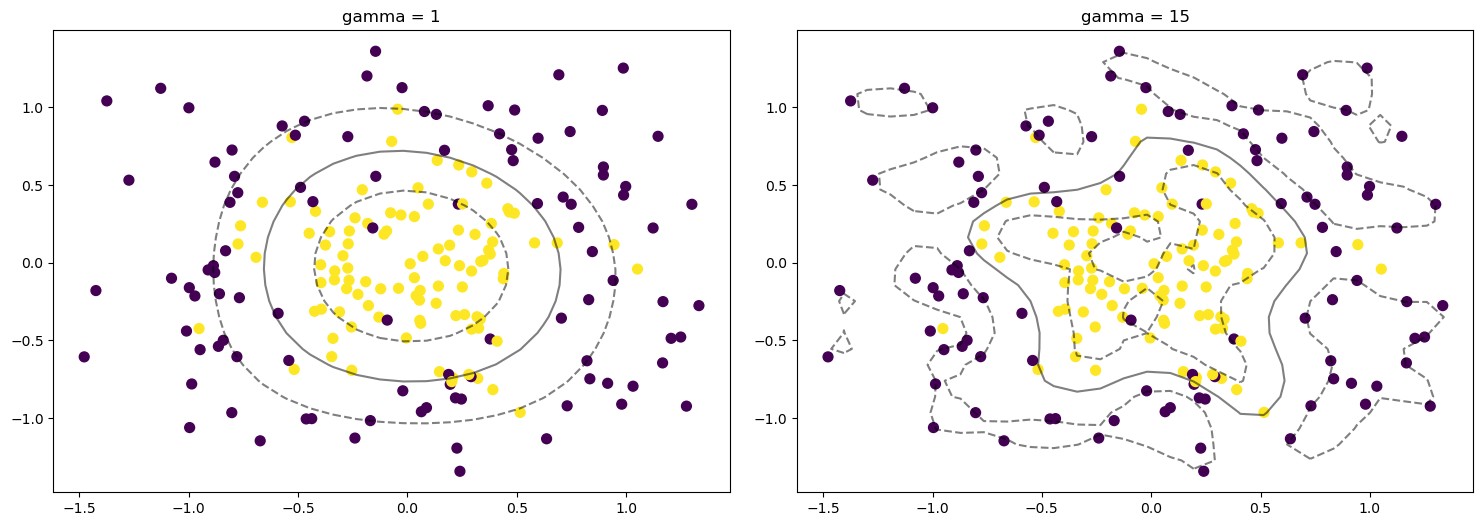

In [12]:
gammas = [1, 15]
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, gamma in zip(ax, gammas):
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50)
    axi.set_title('gamma = {0}'.format(gamma))
    model = SVC(kernel='rbf', gamma=gamma)
    model.fit(X, y)
    plot_svc_decision_function(model, axi)

### 2. Model evaluation and hyper parameters searching. 

##### ***training ratio 0.8 and 0.2*** to split the given data

In [13]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=seed, cluster_std=1.3)

In [14]:
workflow = ['train', 'test']

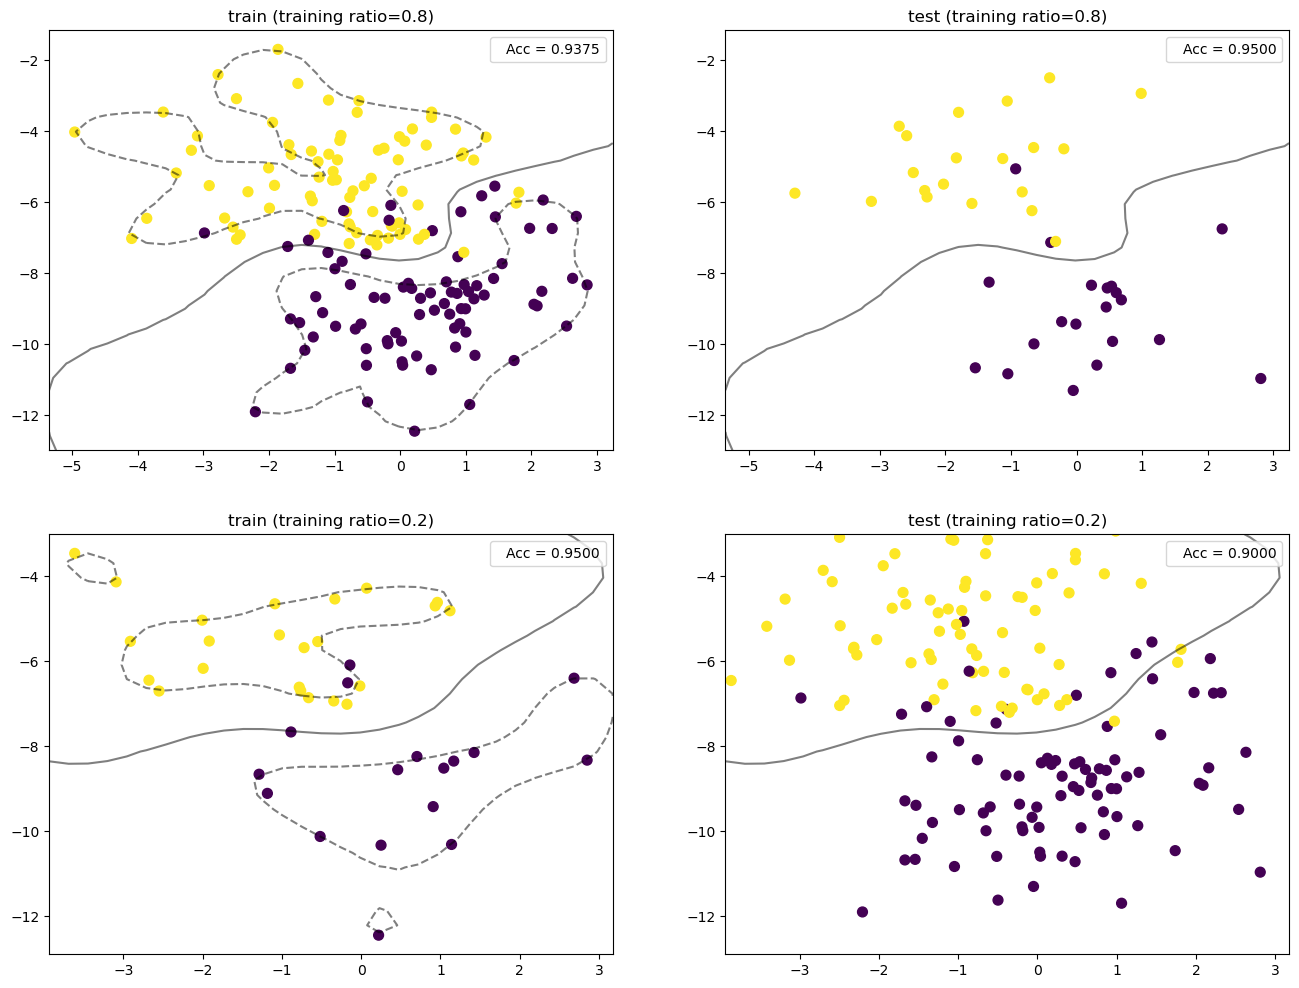

In [15]:
model_ratio = [0.8, 0.2]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2, random_state=0)
model = SVC(kernel='rbf', gamma='auto')
fig, ax = plt.subplots(2, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i, ratio in enumerate(model_ratio):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = ratio, random_state=0)
    for j, mode in enumerate(workflow):
        if mode == 'train':
            model.fit(X_train, y_train)
            ax[i][j].scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, label="Acc = %.4f" %(model.score(X_train, y_train)))
            ax[i][j].set_title(f"{mode} (training ratio={ratio})")
            xlim = ax[i][j].get_xlim()
            ylim = ax[i][j].get_ylim()
            plot_svc_decision_function(model, ax[i][j], mode=mode)
            ax[i][j].legend(markerscale=0, handlelength=0)
        else:
            ax[i][j].scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, label="Acc = %.4f" %(model.score(X_test, y_test)))
            ax[i][j].set_title(f"{mode} (training ratio={ratio})")
            ax[i][j].set_xlim(xlim)
            ax[i][j].set_ylim(ylim)
            plot_svc_decision_function(model, ax[i][j], mode=mode)
            ax[i][j].legend(markerscale=0, handlelength=0)

##### Different values of ***gamma = 1 and 10***

In [16]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=seed, cluster_std=1.5)

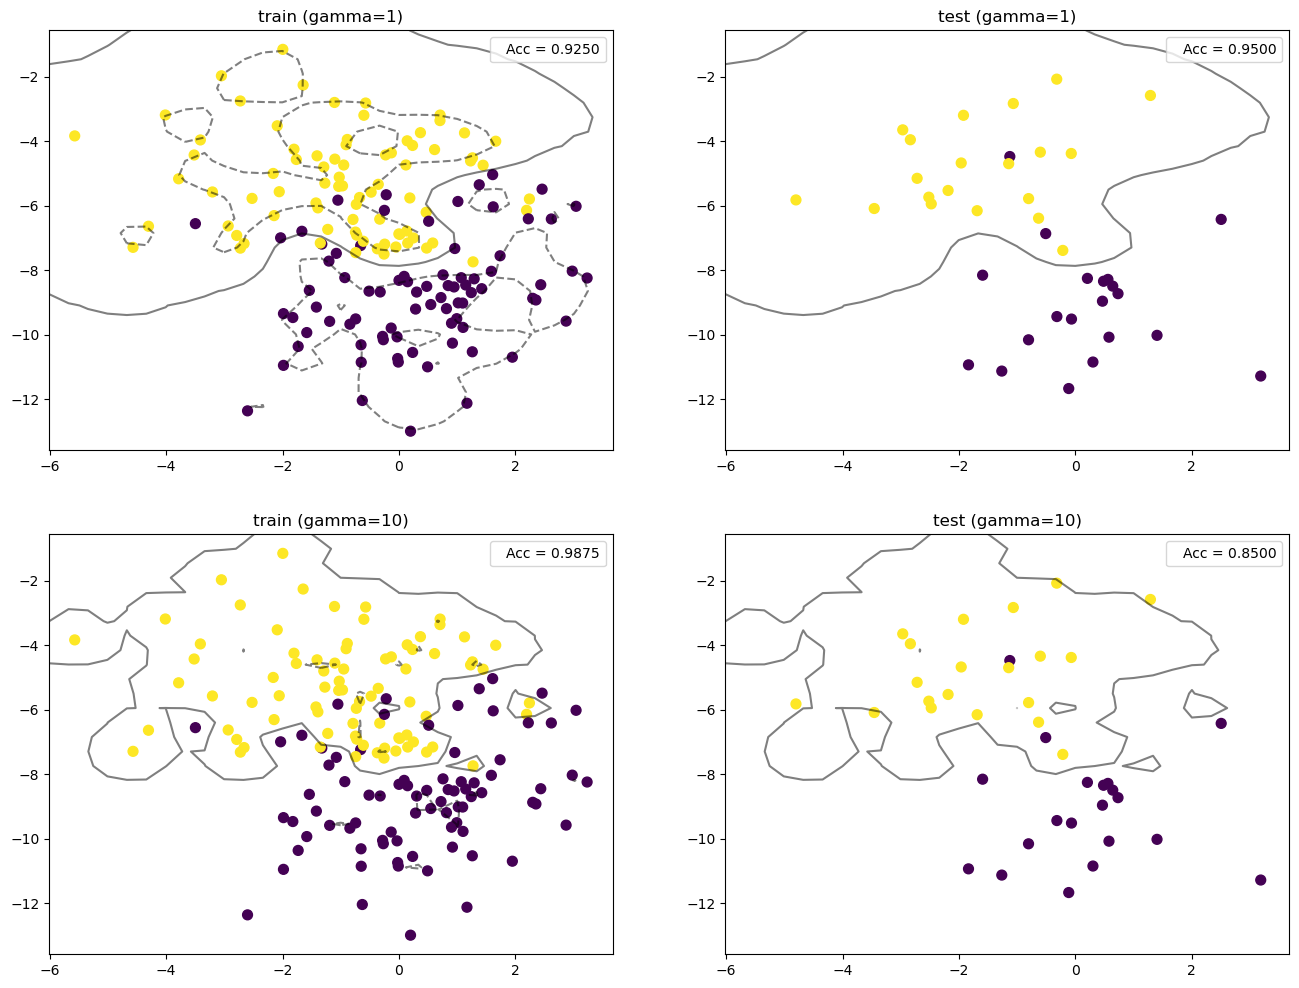

In [17]:
gammas = [1, 10]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=0)
fig, ax = plt.subplots(2, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i, gamma in enumerate(gammas):
    model = SVC(kernel='rbf', gamma=gamma)
    for j, mode in enumerate(workflow):
        if mode == 'train':
            model.fit(X_train, y_train)
            ax[i][j].scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, label="Acc = %.4f" %(model.score(X_train, y_train)))
            ax[i][j].set_title(f'{mode} (gamma={gamma})')
            xlim = ax[i][j].get_xlim()
            ylim = ax[i][j].get_ylim()
            plot_svc_decision_function(model, ax[i][j], mode=mode)
            ax[i][j].legend(markerscale=0, handlelength=0)
        else:
            ax[i][j].scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, label="Acc = %.4f" %(model.score(X_test, y_test)))
            ax[i][j].set_title(f'{mode} (gamma={gamma})')
            ax[i][j].set_xlim(xlim)
            ax[i][j].set_ylim(ylim)
            plot_svc_decision_function(model, ax[i][j], mode=mode)
            ax[i][j].legend(markerscale=0, handlelength=0)

#####  Tune the parameter by the given data with ***GridSearchCV*** function and do the 2 fold cross validation. 

(You can find the details of ***GridSearchCV*** function at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search#sklearn.model_selection.GridSearchCV)

| | 01 | 02 | 03 |
|:---:|:---:|:---:|:---:|
|***Kernel***| Linear | rbf | poly |
|***degree***| 3 | 5 | - |
|***C***| 0.1 | 1 | 10|
|***gamma***| 1 | 0.1 | 0.01|

In [ ]:
# Do not change the data
X, y = make_blobs(n_samples=200, centers=2,random_state=seed, cluster_std=1.5)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'gamma': [1,0.1, 0.01], 'degree': [3, 5], 'kernel': ['rbf', 'poly', 'linear']}
clf_grid = GridSearchCV(SVC(), param_grid, cv=2, n_jobs=5, verbose=2)
clf_grid.fit(X, y)

Fitting 2 folds for each of 54 candidates, totalling 108 fits
[CV] END ...............C=0.1, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...............C=0.1, degree=3, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ............C=0.1, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END ..............C=0.1, degree=3, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..............C=0.1, degree=3, gamma=1, kernel=poly; total time=   0.0s
[CV] END ............C=0.1, degree=3, gamma=1, kernel=linear; total time=   0.0s
[CV] END ............C=0.1, degree=3, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .............C=0.1, degree=3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .............C=0.1, degree=3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.1, degree=3, gamma=0.1, kernel=linear; total time=   0.0s[CV] END ..........C=0.1, degree=3, gamma=0.1, kernel=linear; total time=   0.0s

[CV] END ............C=0.1, degree=3, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(), n_jobs=5,
             param_grid={'C': [0.1, 1, 10], 'degree': [3, 5],
                         'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'poly', 'linear']},
             verbose=2)

In [ ]:
model = clf_grid.best_estimator_
print(model.get_params())

{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


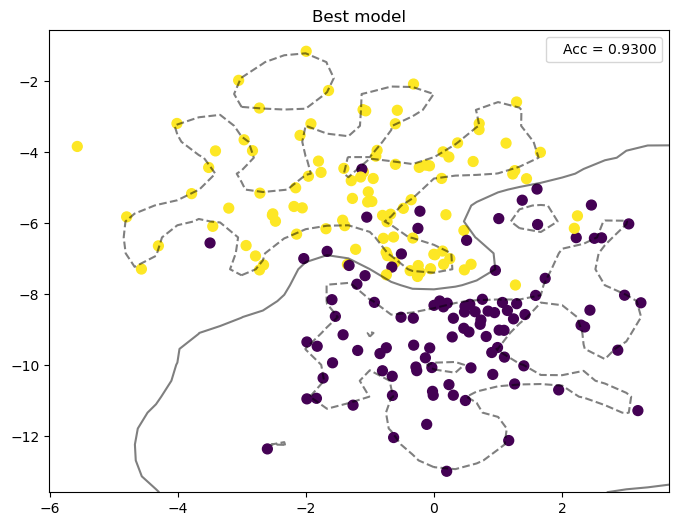

In [ ]:
fig, ax= plt.subplots(1, 1, figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, label="Acc = %.4f" %(model.score(X, y)))
plt.title('Best model')
plot_svc_decision_function(model, ax)
plt.legend(markerscale=0, handlelength=0)
plt.show()